<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = Stu. No. 1
            <br />
            Name = Mobin   
            <br />
            Last_Name = Khatib
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = Mohammad Ali   
            <br />
            Last_Name = Hashemifar
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [17]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Load Dataset and Prepare It

In [9]:

# Define the transformation to add Gaussian noise
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, img):
        noise = torch.randn_like(img) * self.std + self.mean
        noisy_img = img + noise
        noisy_img = torch.clamp(noisy_img, 0, 1)  # Ensure pixel values are in the valid range
        noisy_img_pil = transforms.ToPILImage()(noisy_img)
        return noisy_img_pil

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(mean=0.0, std=0.1)  # Adjust the mean and std as per your requirement
])

# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define Your Model
torch neural network model

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [12]:
# Define the AutoEncoder model
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )

        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define the transformation to add Gaussian noise
class AddGaussianNoise(object):
    def __init__(self, mean=0.0, std=1.0):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        noise = torch.randn_like(tensor) * self.std + self.mean
        noisy_tensor = tensor + noise
        return noisy_tensor

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    AddGaussianNoise(mean=0.0, std=0.1)  # Adjust the mean and std as per your requirement
])

# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the AutoEncoder model
model = AutoEncoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the AutoEncoder
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0

    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        images = images.to(device)

        # Forward pass
        outputs = model(images)

        # Compute the loss
        loss = criterion(outputs, images)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Evaluate the AutoEncoder on test data
model.eval()

with torch.no_grad():
    for data in test_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        images = images.to(device)

        # Forward pass
        outputs = model(images)

        # Compare the original images with the reconstructed images
        # You can visualize and compare the images here

# Save the trained model
torch.save(model.state_dict(), 'autoencoder_model.pth')

Epoch [1/10], Loss: 0.0615
Epoch [2/10], Loss: 0.0382
Epoch [3/10], Loss: 0.0329
Epoch [4/10], Loss: 0.0305
Epoch [5/10], Loss: 0.0286
Epoch [6/10], Loss: 0.0269
Epoch [7/10], Loss: 0.0256
Epoch [8/10], Loss: 0.0246
Epoch [9/10], Loss: 0.0238
Epoch [10/10], Loss: 0.0232


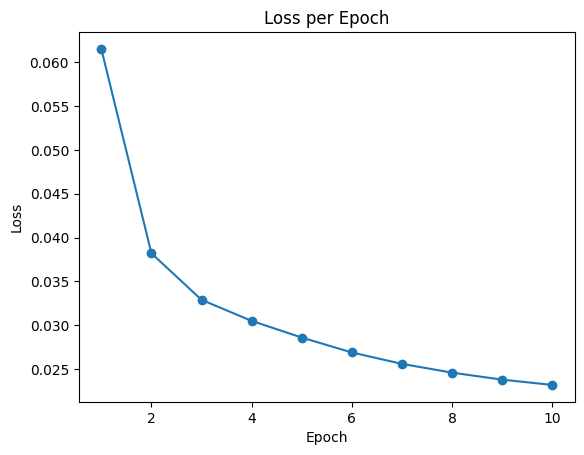

In [13]:
# Recorded losses for each epoch
losses = [0.0615, 0.0382, 0.0329, 0.0305, 0.0286, 0.0269, 0.0256, 0.0246, 0.0238, 0.0232]

# Plotting the epochs against the losses
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.show()

# Plot The Results

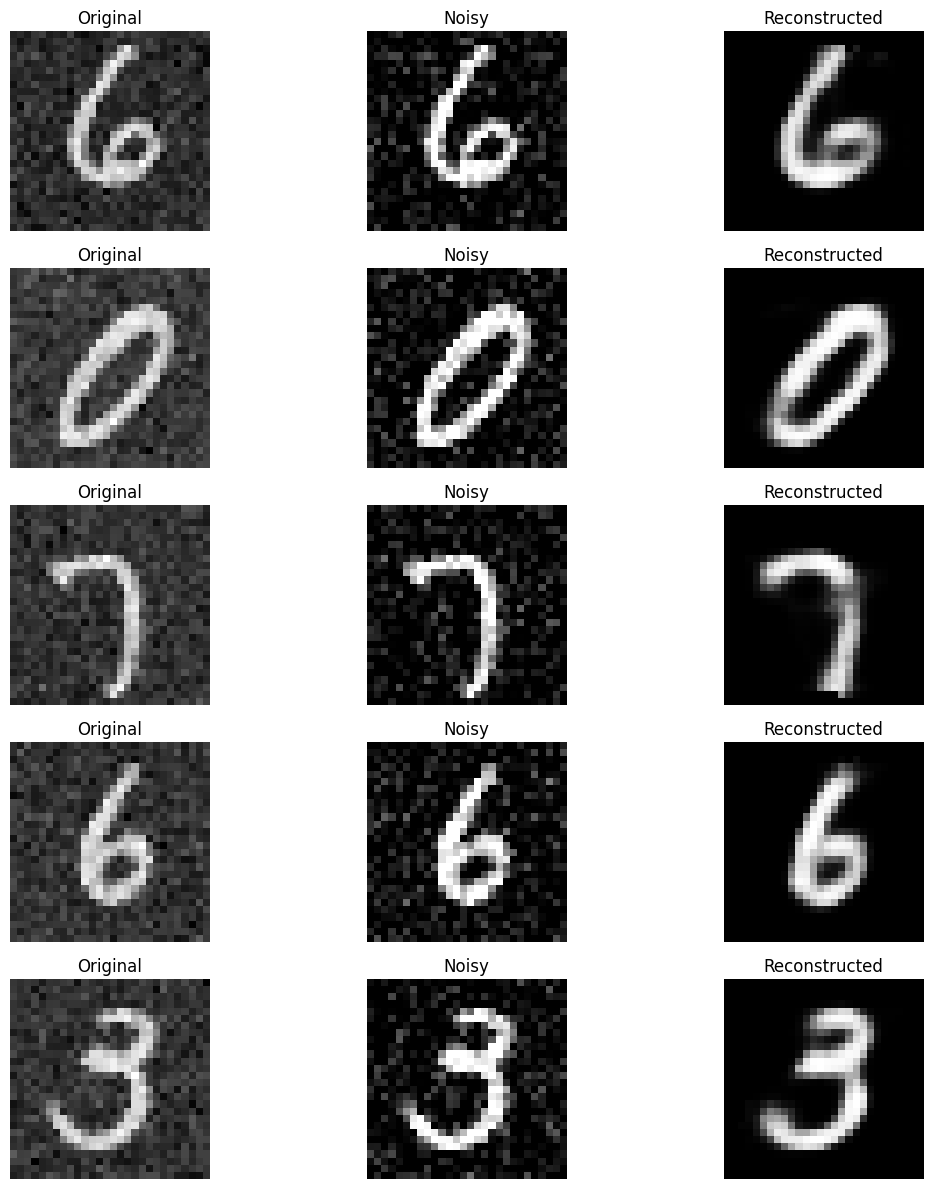

In [15]:

# Set the model to evaluation mode
model.eval()

# Move the model to the device
model.to(device)

# Select a few random images from the test set
num_images = 5
random_indices = torch.randint(0, len(test_dataset), (num_images,))
images = torch.stack([test_dataset[i][0] for i in random_indices]).to(device)

# Add Gaussian noise to the images
noisy_images = images + torch.randn_like(images) * 0.1
noisy_images = torch.clamp(noisy_images, 0, 1)

# Reconstruct the images using the model
reconstructed_images = model(noisy_images.view(-1, 784))
reconstructed_images = reconstructed_images.view(-1, 1, 28, 28)

# Move the images back to the CPU
images = images.cpu()
noisy_images = noisy_images.cpu()
reconstructed_images = reconstructed_images.cpu()

# Create a figure to display the images
figure, axes = plt.subplots(num_images, 3, figsize=(12, 12))

for i in range(num_images):
    # Display the original image
    axes[i, 0].imshow(images[i].squeeze(), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    # Display the noisy image
    axes[i, 1].imshow(noisy_images[i].squeeze(), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Noisy')

    # Display the reconstructed image
    axes[i, 2].imshow(reconstructed_images[i].squeeze().detach(), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Reconstructed')

plt.tight_layout()
plt.show()

# PCA

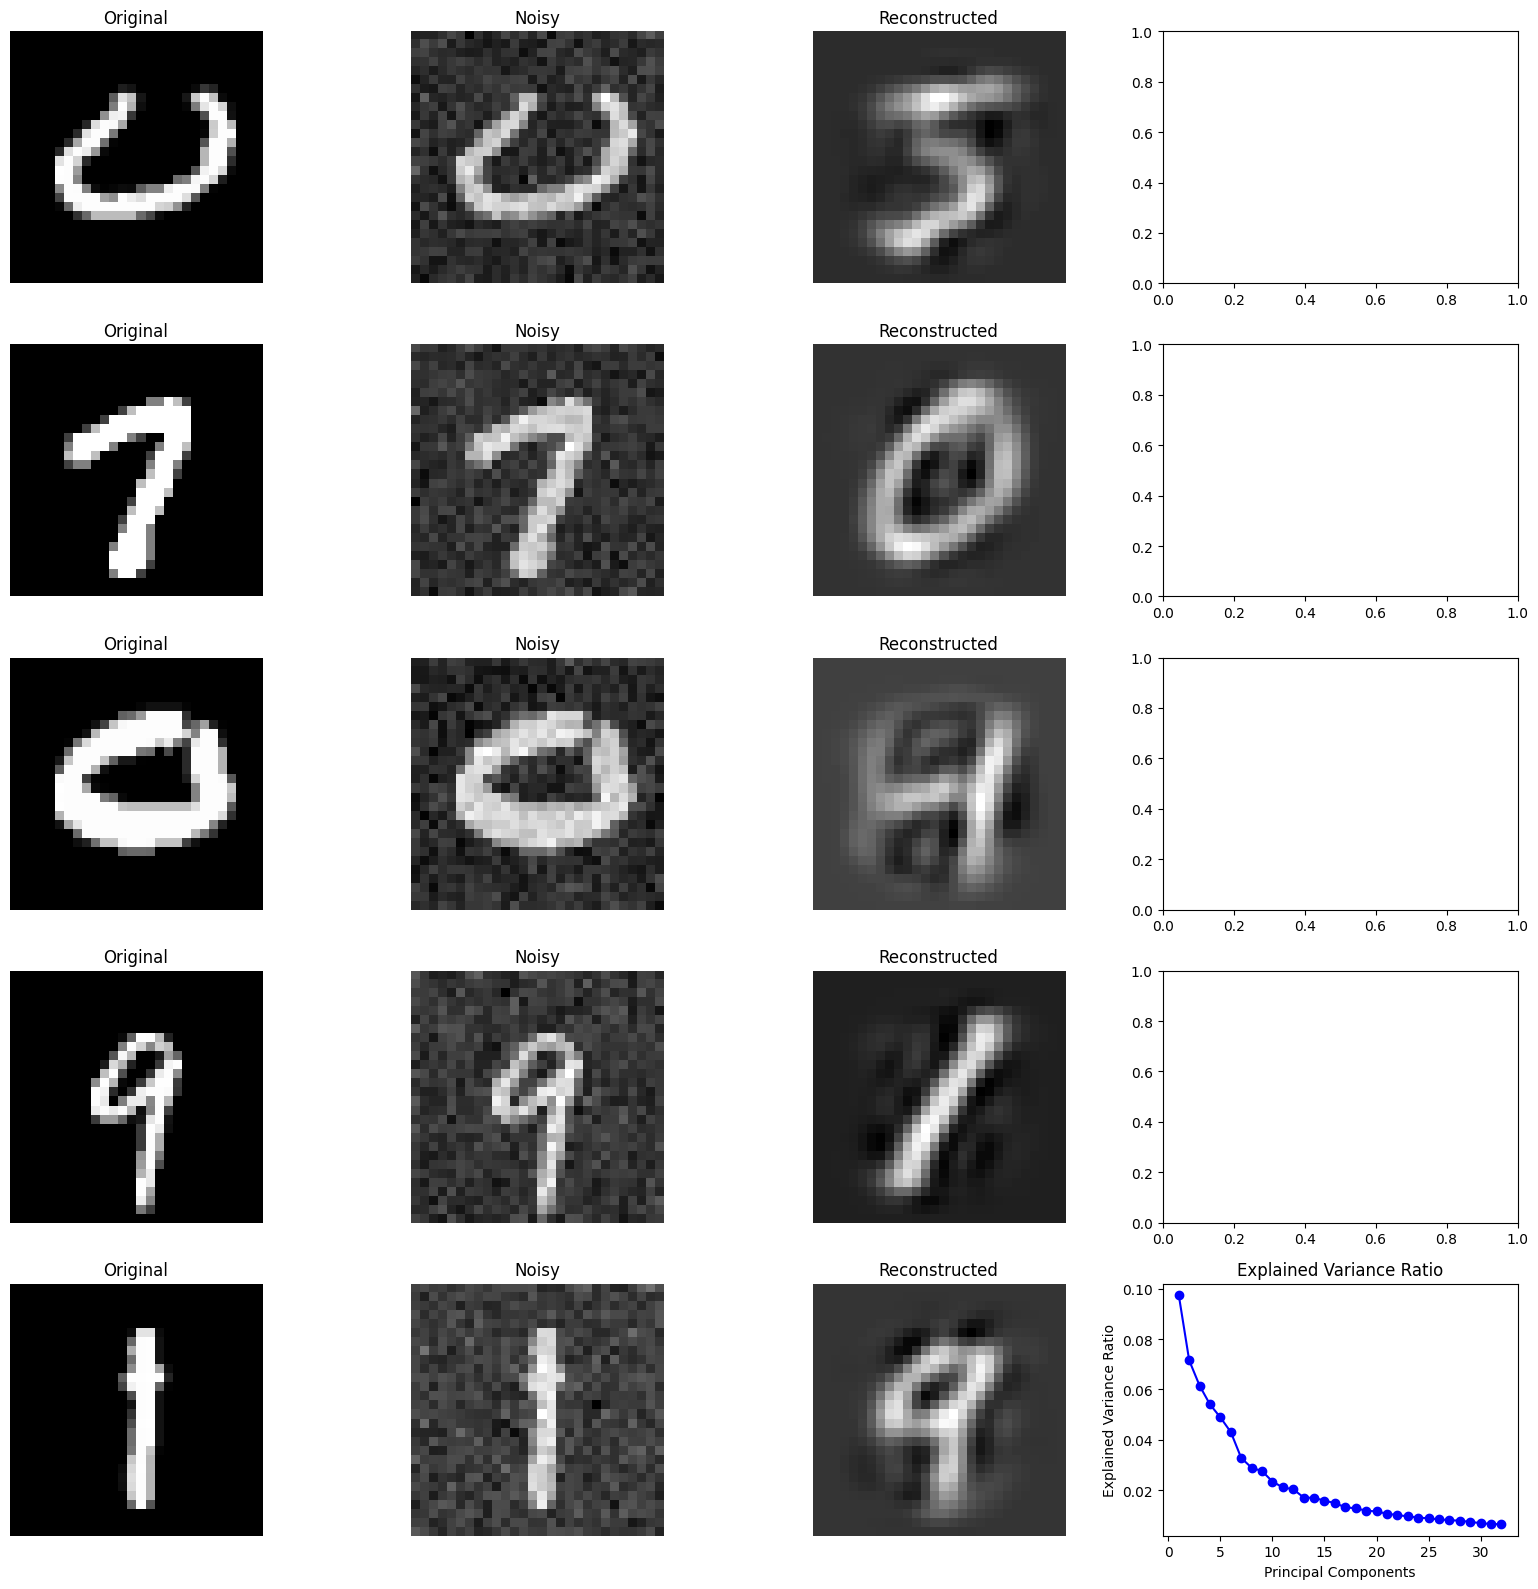

In [25]:


# Download the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# Concatenate the training and test images
all_images = torch.cat([train_dataset.data, test_dataset.data], dim=0)

# Convert the images to float and normalize them
all_images = all_images.float() / 255.0

# Flatten the images
flattened_images = all_images.view(all_images.size(0), -1)
flattened_images = flattened_images.numpy()

# Perform PCA
pca = PCA(n_components=32)  # Adjust the number of components as desired
reduced_images = pca.fit_transform(flattened_images)

# Reconstruct the images
reconstructed_images = pca.inverse_transform(reduced_images)
reconstructed_images = torch.Tensor(reconstructed_images.reshape(-1, 1, 28, 28))

# Add Gaussian noise to the images
noise_mean = 0.0
noise_std = 0.1
noisy_images = all_images + torch.randn_like(all_images) * noise_std + noise_mean

# Visualize the original images, noisy images, reconstructed images, and explained variance ratio
num_images = 5  # Number of images to visualize
indices = torch.randint(0, len(all_images), size=(num_images,))
original_images = all_images[indices]
noisy_images = noisy_images[indices]
explained_variance_ratio = pca.explained_variance_ratio_

# Create a figure to display the images
figure, axes = plt.subplots(num_images, 4, figsize=(16, 16))

for i in range(num_images):
    # Display the original image
    axes[i, 0].imshow(original_images[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    # Display the noisy image
    axes[i, 1].imshow(noisy_images[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Noisy')

    # Display the reconstructed image
    axes[i, 2].imshow(reconstructed_images[i].squeeze(), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Reconstructed')

# Plot the explained variance ratio

components = range(1, len(explained_variance_ratio) + 1)
axes[num_images-1, 3].plot(components, explained_variance_ratio, 'bo-')
axes[num_images-1, 3].set_xlabel('Principal Components')
axes[num_images-1, 3].set_ylabel('Explained Variance Ratio')
axes[num_images-1, 3].set_title('Explained Variance Ratio')

plt.tight_layout()
plt.show()